In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import os
print(os.listdir("../input"))

['MicroChip.csv']


In [2]:
df = pd.read_csv('../input/MicroChip.csv',header = None, names = ["test1","test2","result"])

In [3]:
x_df = df[["test1","test2"]]
y_df = df['result']
X_train, X_test, Y_train, Y_test = tts(x_df, y_df, test_size = 0.3, random_state = 5)

In [4]:
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())
X_train.insert(0, "b", 1)
X_test.insert(0, "b", 1)

In [5]:
X_train = np.array(X_train)
weights = np.zeros(len(X_train[0]))
Y_train = Y_train.values.reshape(Y_train.size, 1)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(0.00000001+h) - (1 - y) * np.log(0.00000001+1 - h)).mean()

In [7]:
iterations = 1200
alpha = 0.005
cost = []

In [8]:
m = len(weights)
for i in range(iterations):
    z = X_train.dot(weights)
    hypothesis = sigmoid(z) 
    hypothesis = np.reshape(hypothesis, (hypothesis.size, 1) )
    hypothesis = hypothesis-Y_train
    X_trans = X_train.transpose()
    hypothesis = X_trans.dot(hypothesis)
    weights = np.reshape(weights, (weights.size, 1))
    weights = weights - (alpha/m) * hypothesis
    cost.append(loss(sigmoid(X_train.dot(weights)), Y_train))

In [9]:
prediction = sigmoid(X_test.dot(weights))
prediction.loc[prediction[0] < 0.5 , 0] = 0
prediction.loc[prediction[0] >= 0.5 , 0] = 1

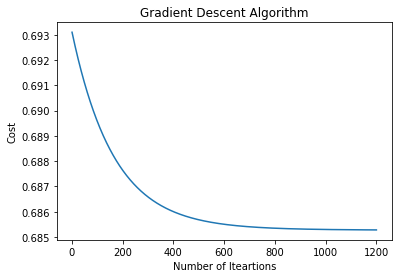

In [10]:
plt.plot(np.arange(1, iterations+1), cost)
plt.xlabel("Number of Iteartions")
plt.ylabel("Cost")
plt.title("Gradient Descent Algorithm")
plt.show()

In [11]:
simple_error = Y_test - prediction
c = 0

for i in range(Y_test.shape[0]):
   # print(i)
   # print(pred.iloc[i][0])
   # print(float(Y_test.iloc[i]))
    if(prediction.iloc[i][0]==Y_test.iloc[i]):
        c += 1
    
accuracy = 100*c/len(Y_test)
print("accuracy : " + str(accuracy))

accuracy : 44.44444444444444


In [12]:
prediction = sigmoid(X_train.dot(weights))
simple_error = Y_train-prediction
print(simple_error)

[[ 0.45473931]
 [ 0.52337967]
 [ 0.57298426]
 [ 0.44113543]
 [ 0.4675641 ]
 [ 0.54971573]
 [ 0.57402408]
 [ 0.53852136]
 [ 0.458925  ]
 [-0.4580146 ]
 [ 0.48137318]
 [-0.56816197]
 [-0.40280571]
 [-0.57861662]
 [-0.38675596]
 [ 0.58773378]
 [-0.57197675]
 [-0.43560898]
 [-0.49174617]
 [-0.39101074]
 [ 0.44004212]
 [ 0.57684765]
 [ 0.44974507]
 [ 0.4218629 ]
 [-0.46134605]
 [ 0.50181326]
 [-0.5934939 ]
 [ 0.44126667]
 [ 0.46261395]
 [ 0.590422  ]
 [-0.60225778]
 [-0.55292294]
 [-0.52295589]
 [-0.5956599 ]
 [ 0.42308095]
 [ 0.52905473]
 [-0.4306136 ]
 [ 0.43468854]
 [ 0.42829579]
 [-0.52836705]
 [ 0.47402385]
 [ 0.51434712]
 [ 0.43571373]
 [ 0.4509217 ]
 [-0.56141026]
 [ 0.4577239 ]
 [-0.57923853]
 [-0.57081246]
 [-0.47906643]
 [ 0.4430291 ]
 [-0.50280239]
 [ 0.55794674]
 [ 0.56474315]
 [ 0.43660197]
 [-0.56412908]
 [-0.51442716]
 [-0.49412342]
 [ 0.47771434]
 [-0.46253498]
 [-0.40394988]
 [-0.41565548]
 [ 0.53653951]
 [-0.50775682]
 [-0.46631504]
 [ 0.46498612]
 [ 0.47877446]
 [-0.42249

In [13]:
squared_error = simple_error**2
print(squared_error)

[[0.20678784]
 [0.27392628]
 [0.32831097]
 [0.19460046]
 [0.21861619]
 [0.30218738]
 [0.32950364]
 [0.29000525]
 [0.21061216]
 [0.20977737]
 [0.23172014]
 [0.32280802]
 [0.16225244]
 [0.33479719]
 [0.14958017]
 [0.345431  ]
 [0.3271574 ]
 [0.18975518]
 [0.2418143 ]
 [0.1528894 ]
 [0.19363707]
 [0.33275321]
 [0.20227063]
 [0.1779683 ]
 [0.21284018]
 [0.25181655]
 [0.35223501]
 [0.19471627]
 [0.21401167]
 [0.34859814]
 [0.36271443]
 [0.30572378]
 [0.27348286]
 [0.35481072]
 [0.17899749]
 [0.2798989 ]
 [0.18542807]
 [0.18895413]
 [0.18343728]
 [0.27917174]
 [0.22469861]
 [0.26455296]
 [0.18984646]
 [0.20333038]
 [0.31518148]
 [0.20951117]
 [0.33551728]
 [0.32582686]
 [0.22950465]
 [0.19627479]
 [0.25281024]
 [0.31130457]
 [0.31893483]
 [0.19062128]
 [0.31824162]
 [0.2646353 ]
 [0.24415795]
 [0.22821099]
 [0.21393861]
 [0.1631755 ]
 [0.17276948]
 [0.28787465]
 [0.25781699]
 [0.21744971]
 [0.21621209]
 [0.22922499]
 [0.17850465]
 [0.25797748]
 [0.18348795]
 [0.16622747]
 [0.36077638]
 [0.26

In [14]:
squared_error_value = sum(squared_error)/len(squared_error)

In [15]:
print("squared_error_value = " + str(squared_error_value))

squared_error_value = [0.24607952]
